<a href="https://colab.research.google.com/github/Anatole-2202/greends-fads-first-project/blob/main/example_health_ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GreenDS

# Fundamentals of Agro-Environmental Data Science

### Introduction

The purpose of this Jupyter Notebook exercise is to demonstrate the workflow in a data science project using this IDE. We will use an example on healthcare that is very much publicised in the data science community.

It is not expected that you can understand the code that is being executed, or the algorithms applied. You will be able to do it by the end of this first master's year. But you should be able to identify, at the high level, the different steps on the data science process:
- Formulate the question
- Obtain and prepare data
- Perform data exploration and analysis
- Develop the model
- Present the results

Another goal is to understand the interface of Jupyter Notebook, how to run code and render markdown cells, and solve problems you may find with unexisting libraries.

# Examples of Data Science Use Cases

## Data Science in Healthcare - Predicting Breast Cancer

This example is based on the following Datacamp [Use Case](https://www.datacamp.com/blog/data-science-use-cases-guide) and Kaggle [example](https://www.kaggle.com/code/vincentlugat/breast-cancer-analysis-and-prediction).

The use case shows an exercise of predition of breast cancer. The dataset is based on measurements made on digitized images of biopsies (fine needle aspiration) of a breast mass. The attributes are as described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. In the dataset, each case is classified as being benign or malignant, which is classified in the Diagnosis attribute.

- ID number
- Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and worst or largets (mean of the three largest of these features were computed for each image, resulting in 30 features.

## 1. Prepare your environment:
- Create a `raw-data`directory in your project's directory to place external data files.
- install and load python libraries necessary to run the python code. This project requires the following libraries:
  - pandas
  - sklearn

In [ ]:
# If you don't have pandas library installed, you can do it at the shell terminal
# with the following commands:
#
# $ pip3 install pandas
# $ pip3 install sklearn
# $ pip3 install seaborn
# $ pip3 install matplotlib

In [1]:
# import pandas library
import pandas as pd

## 2. Download the data file from Kaggle
Go to http://www.kaggle.com/uciml/breast-cancer-wisconsin-data and download the `data.csv` file. Place the file at the `raw-data` directory.

## 3. Read and preview data
Read the data file, and print the shape and a preview of the table:
- number of rows
- number of properties (columns)
- show the first two rows of data

In [10]:
cancer_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw-data/data.csv')
pd.options.display.max_columns = len(cancer_data)
print(f'Number of entries: {cancer_data.shape[0]:,}\n'
      f'Number of features: {cancer_data.shape[1]:,}\n\n'
      f'Number of missing values: {cancer_data.isnull().sum().sum()}\n\n'
      f'{cancer_data.head(2)}')

Number of entries: 569
Number of features: 33

Number of missing values: 569

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860   

The table was loaded to `pandas`, which has the possibility to show a preview of data (head):

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 4. Clean and explore data

You can scroll to the last column of the table above and verify that it contains no values (NaN). We need to remove the last column with missing values:

In [12]:
cancer_data = cancer_data.drop('Unnamed: 32', axis=1)

It is possible to calculate descriptive statistics parameters of the attributes of the data set:

In [13]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Next, let's calculate how many women have a confirmed cancer (a malignant breast tumor)?

In [14]:
cancer_data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


We can calculate these values as percentages:

In [15]:
round(cancer_data['diagnosis'].value_counts()*100/len(cancer_data)).convert_dtypes()

,count
diagnosis,
B,63
M,37


## 5. Visualize data

We can get a better insight of the data if we compare values for benign and malignant cases. Seaborn is one of the powerfull libraries to visualize data.

In [16]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

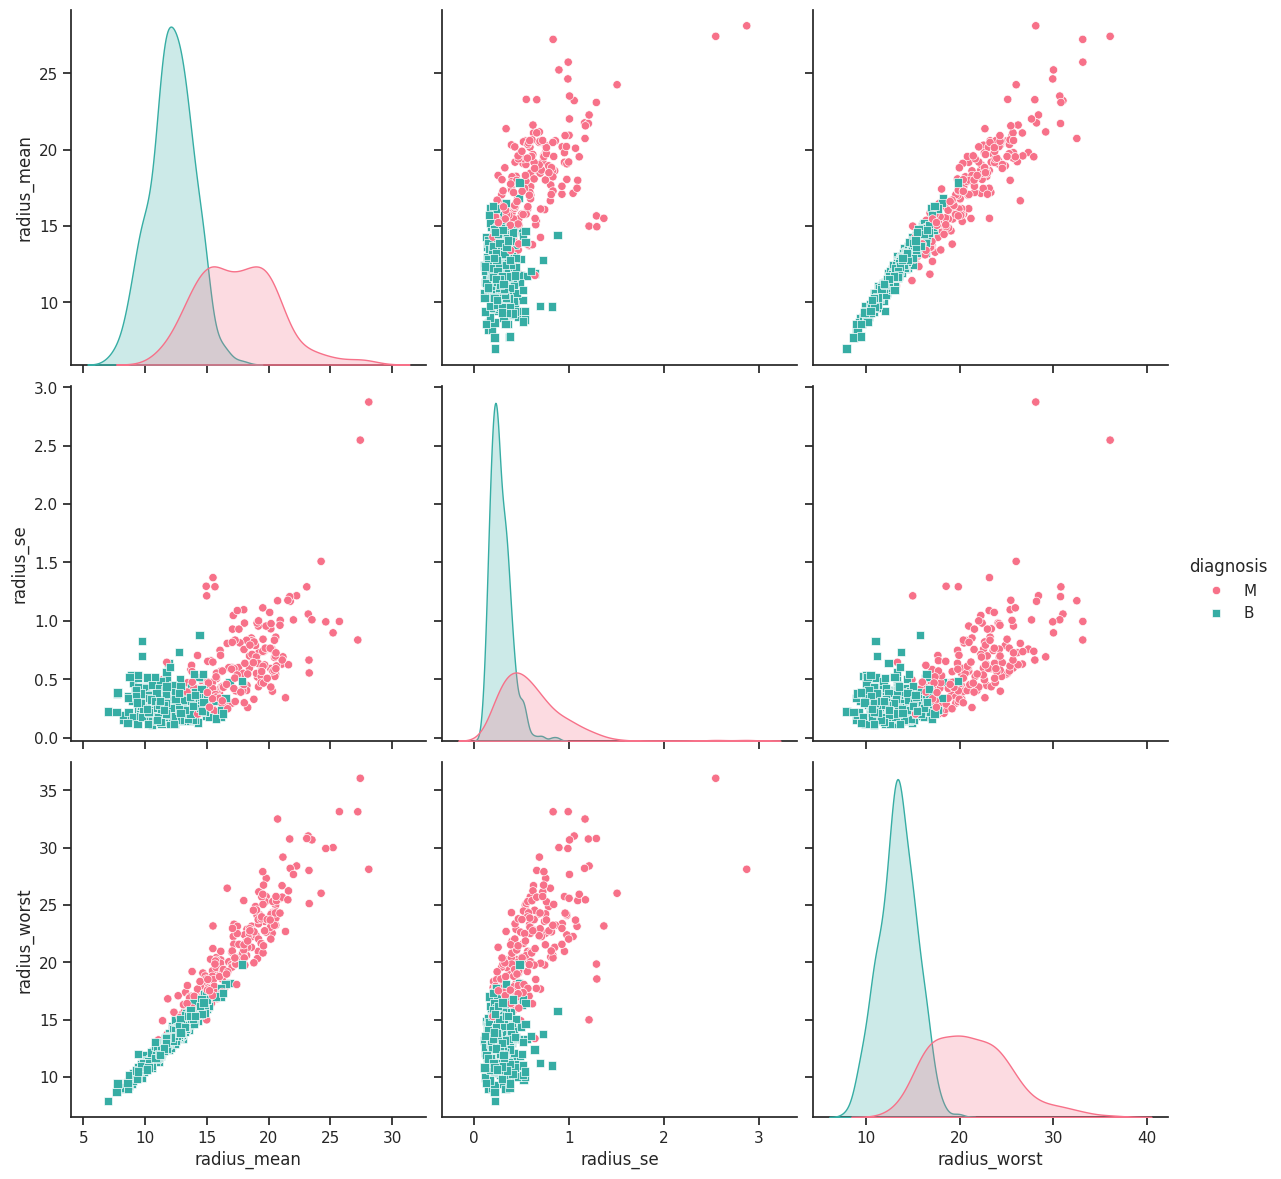

In [17]:
radius = cancer_data[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis',palette="husl", markers=["o", "s"],height=4)

We can do another visualization, adding linear regression lines.

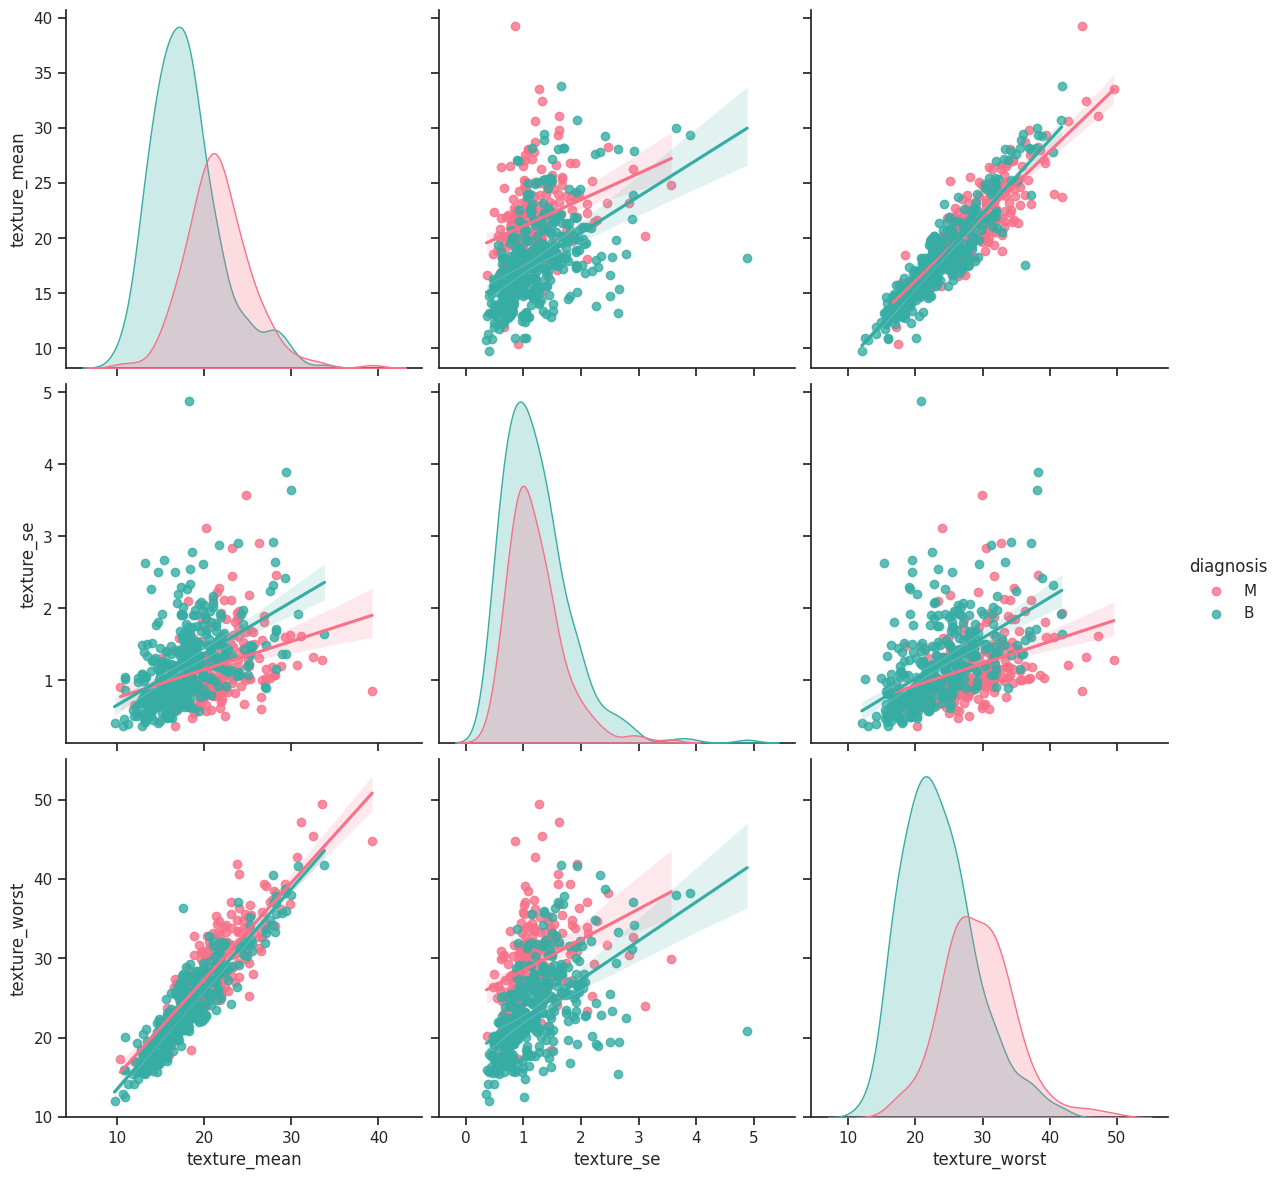

In [18]:
texture = cancer_data[['texture_mean','texture_se','texture_worst','diagnosis']]
sns.pairplot(texture, hue='diagnosis', palette="husl",height=4, kind="reg")

Another visualization which display the histogram for each category, is called violinplot. We will do this in groups of ten variables.

In [19]:
# y includes our labels and x includes our features
y = cancer_data.diagnosis # M or B
list_drp = ['id','diagnosis']
x = cancer_data.drop(list_drp, axis = 1 )

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se'),
  Text(15, 0, 'compactness_se'),
  Text(16, 0, 'concavity_se'),
  Text(17, 0, 'concave points_se'),
  Text(18, 0, 'symmetry_se'),
  Text(19, 0, 'fractal_dimension_se'),
  Text(20, 0, 'radius_worst'),
  Text(21, 0, 'texture_worst'),
  Text(22, 0, 'perimeter_worst'),
  Text(23, 0, 'area_worst'),
  Text(24, 0, 'smoothness_worst'),
  Text(25, 0, 'compactness_w

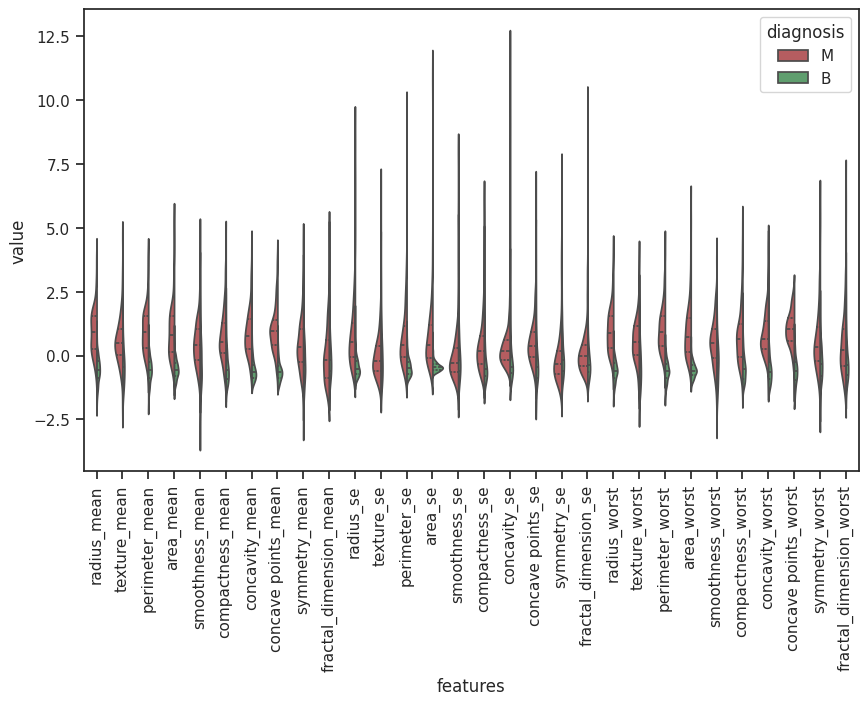

In [20]:
import matplotlib.pyplot as plt

data_dia = y
data = x
# standardization of the data
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,0:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart",palette ={"B": "g", "M": "r"})
plt.xticks(rotation=90)

We can represent using box plots the worst values of the features.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

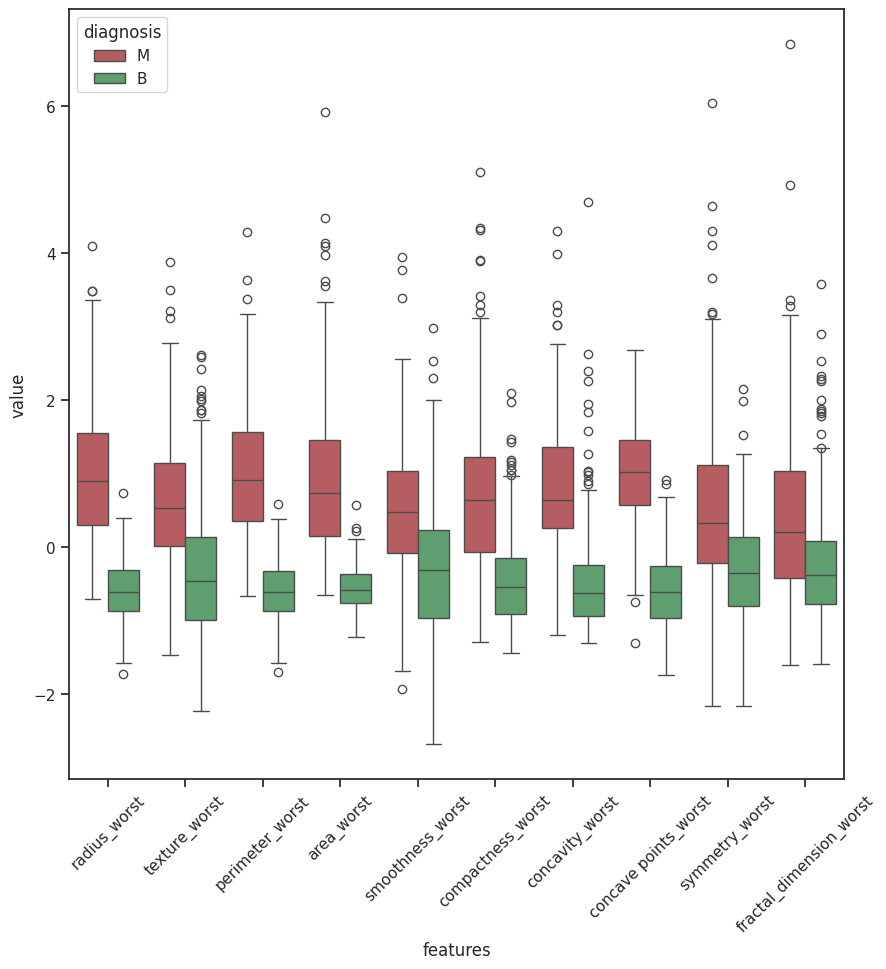

In [21]:
# box-plots
data = pd.concat([y,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=data, palette ={"B": "g", "M": "r"})
plt.xticks(rotation=45)

To explore correlations between independent variables, we can calculate the correlation matrix, and represented with a heatmap:

<Axes: >

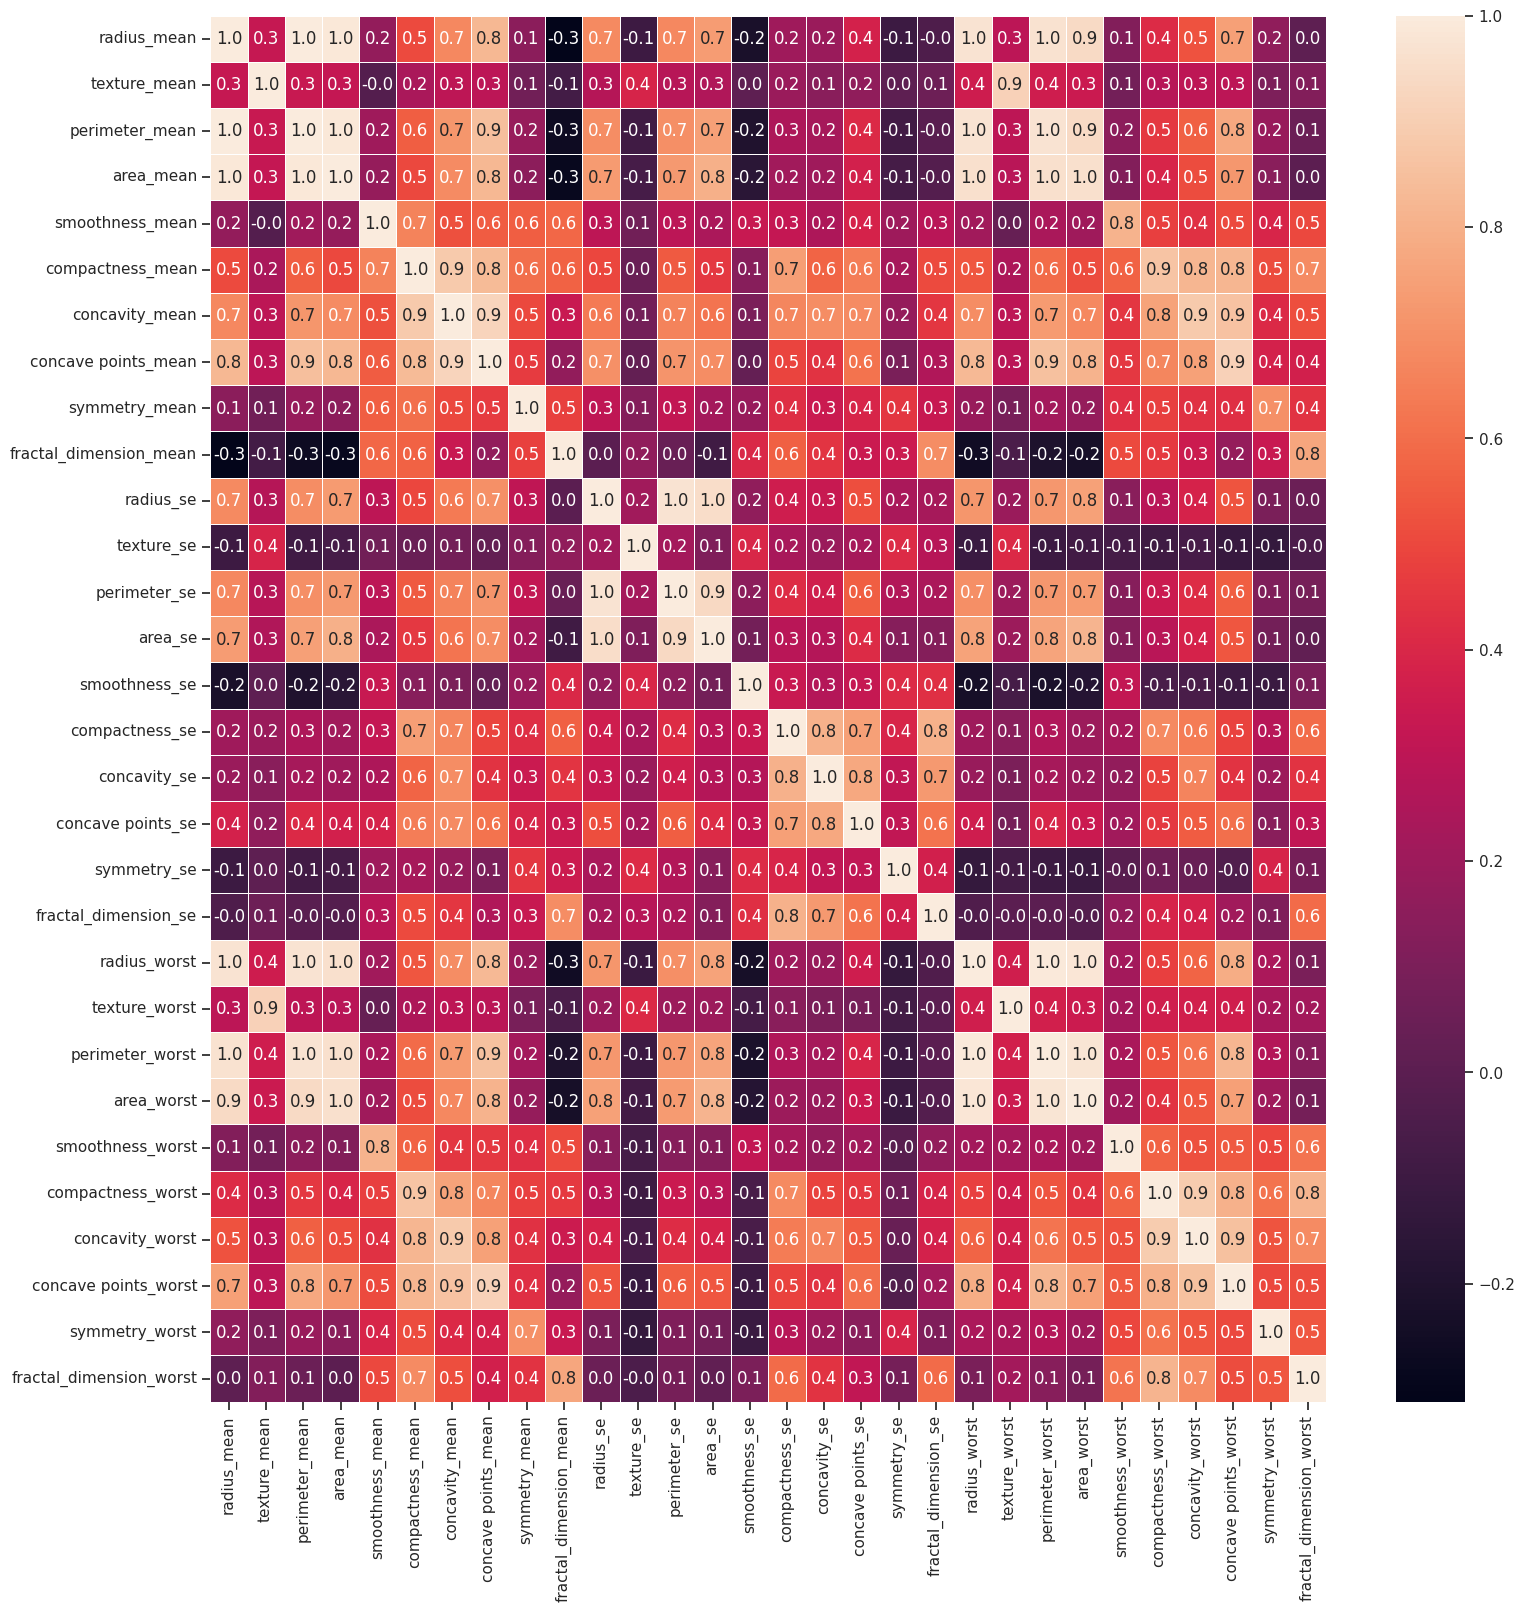

In [22]:
# correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## 6. Build the model

We will calculate two models: on based on the [K-nearest neighors (KNN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm, and the other based on [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression).

First, we will define the X (independent) and Y (dependent) variables:

In [23]:
X = cancer_data.iloc[:, 2:32].values
y = cancer_data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

It is important to divide the dataset in two subsets, one for training (creating) the model, and other for testing. This is important to make sure that the model is not overfitted, and can be applied to other data.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In this example, we will try two models:
- K-Nearest Neighbor (KNN)
- Logistic Regression

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# Logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

## 7. Evaluate the model

We can calculate the accuracy of the models. This value returns the fraction of correctly classified samples, in the test subset.

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'Accuracy scores:\n'
      f'KNN model:\t\t   {accuracy_score(y_test, knn_predictions):.3f}\n'
      f'Logistic regression model: {accuracy_score(y_test, lr_predictions):.3f}')

Accuracy scores:
KNN model:		   0.956
Logistic regression model: 0.974


Another way of evaluation the model is to calculate the confusion matrix *C*, in which *C<sub>i,j</sub>* is the number of observations which true value is *i*, and was predicted to be *j*.
It gives the values of true negatives (*C<sub>0,0</sub>*), false negatives (*C<sub>1,0</sub>*), true positives (*C<sub>1,1</sub>*) and false positives (*C<sub>0,1</sub>*).

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression model')

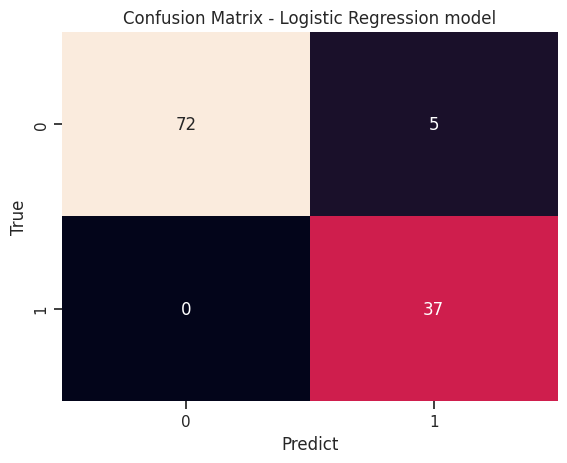

In [27]:
matrix = confusion_matrix(knn_predictions, y_test)
sns.heatmap(matrix, cbar=False, annot=True)
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression model')